**Importy:**

In [ ]:
!pip install numpy-financial
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

**Parametry zadania:**

In [ ]:
price_now = 120000   #cena mieszkania obecnie [zł]
growth_rate = 0,05    #roczna stopa wzrostu cen mieszkań
years = 5    #liczba lat
nominal_rate = 0,12   #roczna nominalna stopa procentowa na lokacie
freq = 12   #kapitalizacja miesięczna

**Cena mieszkanaia za 5 lat:**

In [5]:
future_price = price_now * (1 + growth_rate) ** years
print(f"Cena mieszkania za 5 lat: {future_price:.2f} zł")

Cena mieszkania za 5 lat: 153153.79 zł


**Parametry lokaty:**

In [ ]:
monthly_rate = nominal_rate / freq   #stopa miesięczna
n_months = years * freq   #liczba miesięcy

**Obliczanie miesięcznej wpłaty na lokatę:**

In [7]:
monthly_payment = npf.pmt(monthly_rate, n_months, 0, -future_price)
print(f"Miesięczna wpłata potrzebna na lokatę: {monthly_payment:.2f} zł")

Miesięczna wpłata potrzebna na lokatę: 1875.28 zł


**Generowanie danych do wykresu:**

In [ ]:
months = np.arange(1, n_months + 1)   #liczba miesięcy
price_trend = np.linspace(price_now, future_price, n_months)   #cena mieszkania
savings = np.zeros(n_months)   #wartość lokaty

**Obliczanie wartości lokaty w każdym miesiącu:**

In [9]:
factors = (1 + monthly_rate) ** np.arange(n_months)
savings = monthly_payment * np.cumsum(factors[::-1])[::-1] / (1 + monthly_rate)

**Tworzenie wykresu:**

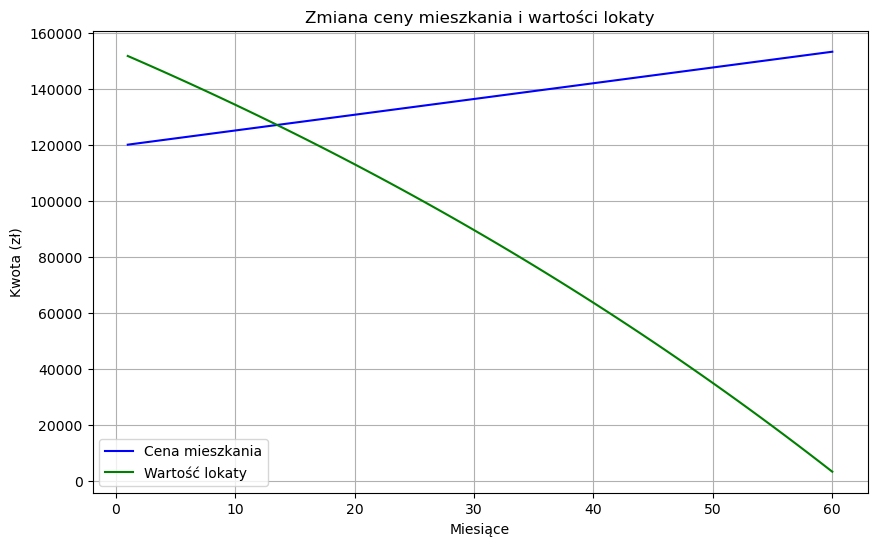

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(months, price_trend, label='Cena mieszkania', color='blue')
plt.plot(months, savings, label='Wartość lokaty', color='green')
plt.xlabel('Miesiące')
plt.ylabel('Kwota (zł)')
plt.title('Zmiana ceny mieszkania i wartości lokaty')
plt.legend()
plt.grid(True)
plt.show()